In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

# importing linear regression function
import sklearn.linear_model as lm

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
# Load data
df = pd.read_csv('TS_Real.csv')
print(df)

    Hours_Studied  Test_Grade
0            2.02    0.242190
1            2.04   -0.067706
2            2.06   -0.129536
3            2.08   -0.157141
4            3.00   -0.165653
5            3.02   -0.160579
6            3.04   -0.150587
7            3.06   -0.136620
8            3.08   -0.092859
9            4.00   -0.059486
10           4.05   -0.025941
11           6.00   -0.011126
12           8.00   -0.004970


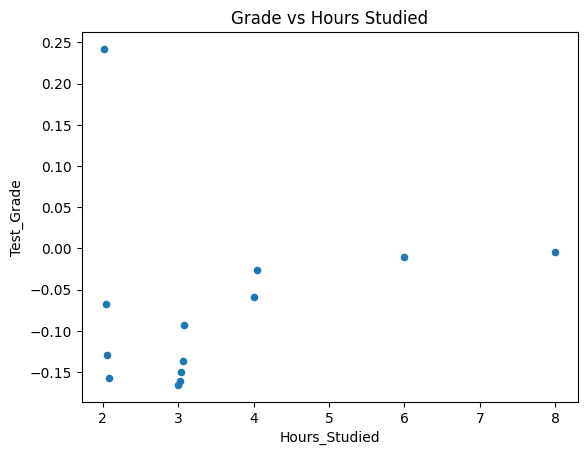

In [3]:
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', 
        title='Grade vs Hours Studied')
plt.show()

In [4]:
# check the correlation between variables
print("Correlation Matrix: ")
print(df.corr())

Correlation Matrix: 
               Hours_Studied  Test_Grade
Hours_Studied       1.000000    0.164181
Test_Grade          0.164181    1.000000


In [5]:
# Create linear regression object
lr = lm.LinearRegression()
x = df['Hours_Studied'].values[:, np.newaxis] # independent variable
y = df['Test_Grade'].values # dependent variable

In [6]:
# Train the model using the training sets
lr.fit(x, y)
print("Intercept: ", lr.intercept_)
print("Coefficient: ", lr.coef_)

Intercept:  -0.10720338159376172
Coefficient:  [0.0104209]


In [7]:
# predict using the built-in function
print("Using predict function: ", lr.predict([[6]]))

Using predict function:  [-0.04467798]


Text(0.5, 0, 'Hours_Studied')

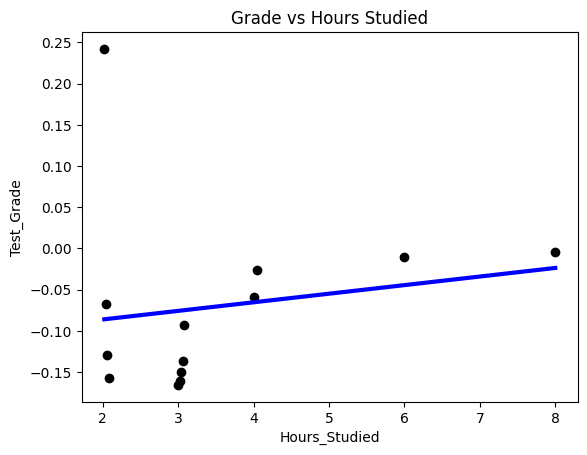

In [8]:
# plotting fitted line
plt.scatter(x, y, color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')

In [9]:
# add predict value to the data frame
df['Test_Grade_Pred'] = lr.predict(x)

In [10]:
# Manually calculating R Squared
df['SST'] = np.square(df['Test_Grade'] - df['Test_Grade'].mean())
df['SSR'] = np.square(df['Test_Grade_Pred'] - df['Test_Grade'].mean())

print("Sum of SSR:", df['SSR'].sum())
print("Sum of SST:", df['SST'].sum())

print(df)
df.to_csv('r-squared.csv', index=False)

print("R Squared using manual calculation: ", df['SSR'].sum() / df['SST'].sum())

Sum of SSR: 0.00396658054232045
Sum of SST: 0.1471539475399846
    Hours_Studied  Test_Grade  Test_Grade_Pred       SST       SSR
0            2.02    0.242190        -0.086153  0.097944  0.000237
1            2.04   -0.067706        -0.085945  0.000009  0.000230
2            2.06   -0.129536        -0.085736  0.003453  0.000224
3            2.08   -0.157141        -0.085528  0.007460  0.000218
4            3.00   -0.165653        -0.075941  0.009003  0.000027
5            3.02   -0.160579        -0.075732  0.008066  0.000025
6            3.04   -0.150587        -0.075524  0.006371  0.000023
7            3.06   -0.136620        -0.075315  0.004336  0.000021
8            3.08   -0.092859        -0.075107  0.000488  0.000019
9            4.00   -0.059486        -0.065520  0.000127  0.000028
10           4.05   -0.025941        -0.064999  0.002010  0.000033
11           6.00   -0.011126        -0.044678  0.003557  0.000681
12           8.00   -0.004970        -0.023836  0.004330  0.002203

In [11]:
# Using built-in function
print("R Squared using built-in function: ", r2_score(df.Test_Grade, df.Test_Grade_Pred))
print("Mean Absolute Error: ", mean_absolute_error(df.Test_Grade, df.Test_Grade_Pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Test_Grade, df.Test_Grade_Pred)))

R Squared using built-in function:  0.02695531182568267
Mean Absolute Error:  0.06832162858271398
Root Mean Squared Error:  0.10494957287180431


In [12]:
#POLYNOMIAL REGRESSION

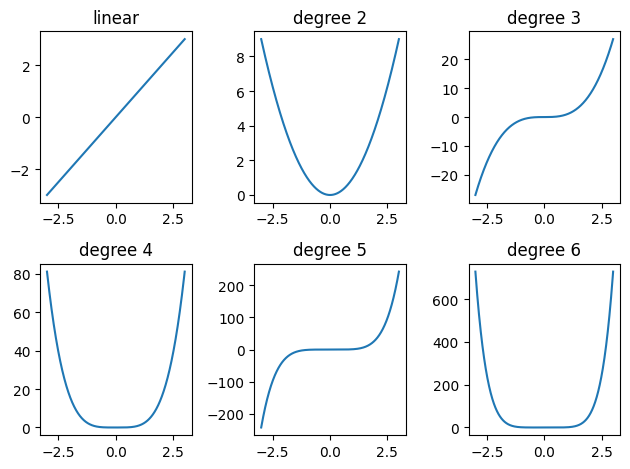

In [13]:
x = np.linspace(-3,3,1000)

# Plot subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

ax1.plot(x, x)
ax1.set_title('linear')

ax2.plot(x, x**2)
ax2.set_title('degree 2')

ax3.plot(x, x**3)
ax3.set_title('degree 3')

ax4.plot(x, x**4)
ax4.set_title('degree 4')

ax5.plot(x, x**5)
ax5.set_title('degree 5')

ax6.plot(x, x**6)
ax6.set_title('degree 6')

plt.tight_layout()# tidy layout

In [14]:
# # Load data
# df = pd.read_csv('TS_Real.csv.csv')
# print(df)
# Load data
df = pd.read_csv('TS_Real.csv')
print(df)


    Hours_Studied  Test_Grade
0            2.02    0.242190
1            2.04   -0.067706
2            2.06   -0.129536
3            2.08   -0.157141
4            3.00   -0.165653
5            3.02   -0.160579
6            3.04   -0.150587
7            3.06   -0.136620
8            3.08   -0.092859
9            4.00   -0.059486
10           4.05   -0.025941
11           6.00   -0.011126
12           8.00   -0.004970


<Axes: title={'center': 'Grade vs Hours Studied'}, xlabel='Hours_Studied', ylabel='Test_Grade'>

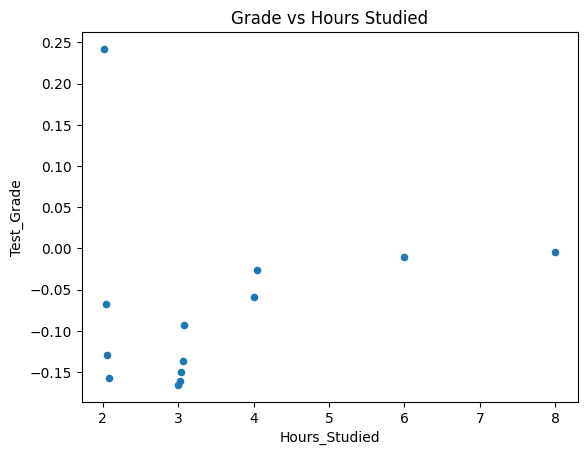

In [15]:
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade',
        title='Grade vs Hours Studied')

In [16]:
# check the correlation between variables
print("Correlation Matrix: ")
print(df.corr())

Correlation Matrix: 
               Hours_Studied  Test_Grade
Hours_Studied       1.000000    0.164181
Test_Grade          0.164181    1.000000


               Hours_Studied  Test_Grade
Hours_Studied       1.000000    0.164181
Test_Grade          0.164181    1.000000


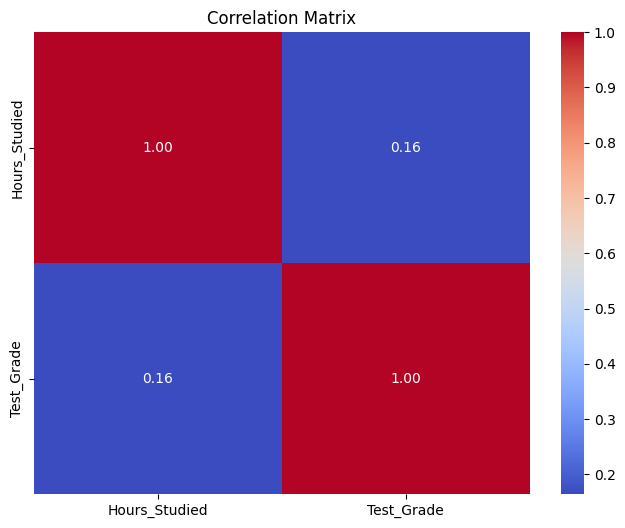

In [17]:
# Assuming your DataFrame `df` contains columns 'Hours_Studied' and 'Test_Grade'
# You can include more columns as needed for correlation

# Compute the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
print(corr_matrix)

# Optional: Visualize the correlation matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [18]:
# # Create linear regression object
# lr = lm.LinearRegression()
# x = df.Hours_Studied[:, np.newaxis]
# y = df.Test_Grade

# Create linear regression object
lr = lm.LinearRegression()
x = df['Hours_Studied'].values[:, np.newaxis] # independent variable
y = df['Test_Grade'] # dependent variable

In [19]:
# Train the model using the training sets
lr.fit(x, y)

LinearRegression()

R Squared:  0.02695531182568267


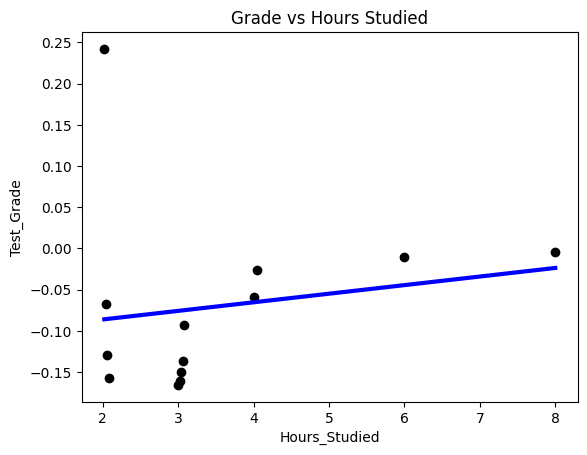

In [20]:
# plotting fitted line
plt.scatter(x, y, color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')

print("R Squared: ", r2_score(y, lr.predict(x)))

In [21]:
lr = lm.LinearRegression()
x = df.Hours_Studied # independent variable
y = df.Test_Grade # dependent variable

R-squared for degree 1 =  0.02695531182568267
R-squared for degree 2 =  0.08990471618449825
R-squared for degree 3 =  0.22568859321499646
R-squared for degree 4 =  0.34821626056295363
R-squared for degree 5 =  0.790293357895204


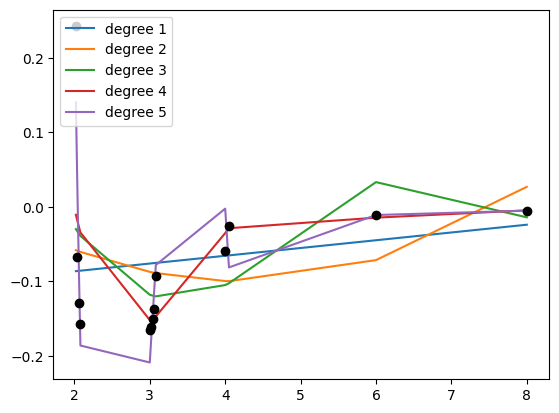

In [22]:
# NumPy's vander function will return powers of the input vector
for deg in [1, 2, 3, 4, 5]:
    lr.fit(np.vander(x, deg + 1), y);
    y_lr = lr.predict(np.vander(x, deg + 1))
    plt.plot(x, y_lr, label='degree ' + str(deg));
    plt.legend(loc=2);
    print("R-squared for degree " + str(deg) + " = ", r2_score(y, y_lr))

plt.plot(x, y, 'ok')

In [23]:
#Scikit-learn Polynomial Regression Features

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [25]:
# x = df[Hours_Studied].values[:, np.newaxis] # independent variable
# y = df[Test_Grade] # dependent variable
x = df['Hours_Studied'].values[:, np.newaxis] # independent variable
y = df['Test_Grade'] # dependent variable

In [26]:
degree = 10 #order level of polynomial
model = make_pipeline(PolynomialFeatures(degree), lr)

model.fit(x, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('linearregression', LinearRegression())])

R Squared using built-in function:  0.9873605048033226


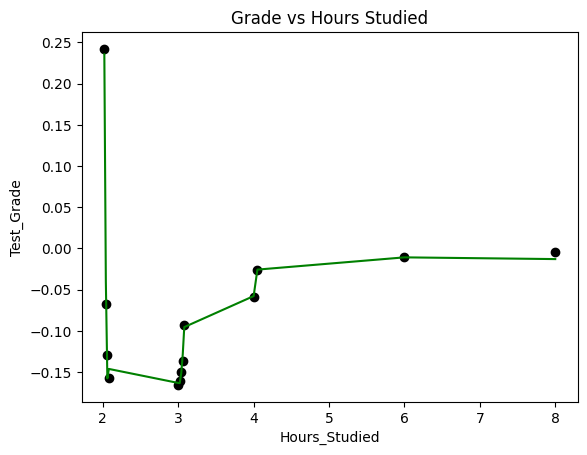

In [27]:
plt.scatter(x, y, color='black')
plt.plot(x, model.predict(x), color='green')
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')

print("R Squared using built-in function: ",
      r2_score(y, model.predict(x)))

In [28]:
#NON-LINEAR REGRESSION

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [30]:
y = np.array([1.0, 1.5, 2.4, 2, 1.49, 1.2, 1.3, 1.2, 0.5])

In [31]:
# # Function for non-liear curve fitting
# def func(x, p1,p2):
#     return p1*np.sin(p2*x) + p2*np.cos(p1*x)

# popt,pcov = curve_fit(func(x, y,p0=(1.0,0.2)))
# p1 = popt[0]
# p2 = popt[1]
# residuals = y - func(x,p1,p2)
# fres = sum(residuals**2)

In [32]:
import numpy as np
from scipy.optimize import curve_fit

# Function for non-linear curve fitting
def func(x, p1, p2):
    return p1 * np.sin(p2 * x) + p2 * np.cos(p1 * x)

# Data
x = np.array([1, 2, 3, 4, 5])
y = np.array([0.5, 1.0, 1.5, 2.0, 2.5])

# Curve fitting
popt, pcov = curve_fit(func, x, y, p0=(1.0, 0.2))
p1 = popt[0]
p2 = popt[1]
residuals = y - func(x, p1, p2)
fres = sum(residuals ** 2)

# Print results
print("Optimized parameters (p1, p2):", popt)
print("Residual sum of squares:", fres)


Optimized parameters (p1, p2): [1.5520883  0.34743538]
Residual sum of squares: 1.0520701980732323


In [33]:
curvex=np.linspace(-2,3,100)
curvey=func(curvex,p1,p2)

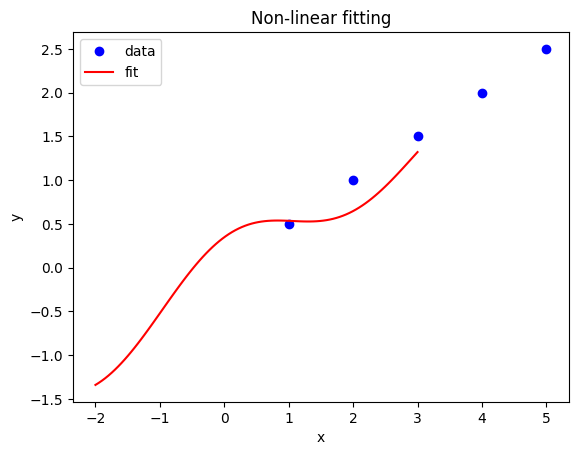

In [34]:
plt.plot(x,y,'bo ')
plt.plot(curvex,curvey,'r')
plt.title('Non-linear fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data','fit'],loc='best')
plt.show()

In [35]:
#Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

# Load data
df = pd.read_csv('TS_Real_class.csv')
print (df)

# x= df.Hours_Studied[:, np.newaxis] # independent variable
# y= df.Result # dependent variable
x = df['Hours_Studied'].values[:, np.newaxis] # independent variable
y = df['Result'] # dependent variable

FileNotFoundError: [Errno 2] No such file or directory: 'TS_Real_class.csv'

In [ ]:
# manually add intercept
df['intercept'] = 1
independent_variables = ['Hours_Studied', 'intercept']

x = df[independent_variables] # independent variable
y = df['Result'] # dependent variable

In [ ]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(x, y)

In [ ]:
# check the accuracy on the training set
model.score(x, y)

In [ ]:
# predict_proba will return array containing probability of y = 0 and y = 1
print('Predicted probability:', model.predict_proba(x)[:,1])

# predict will give convert the probability(y=1) values > .5 to 1 else 0
print('Predicted Class:',model.predict(x))

In [ ]:
# plotting fitted line
plt.scatter(df.Hours_Studied, y, color='black')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.Hours_Studied, model.predict_proba(x)[:,1], color='blue', linewidth=3)
plt.title('Hours Studied vs Result')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')
plt.show()

In [ ]:
#Linear SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

In [ ]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

#save_fig("large_margin_classification_plot")
plt.show()

In [ ]:
#Nonlinear SVM

In [ ]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

#save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

#save_fig("moons_polynomial_svc_plot")
plt.show()

In [ ]:
#Polynomial Kernel

In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

#save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

In [ ]:
#Gaussian RBF

In [ ]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

#save_fig("kernel_method_plot")
plt.show()

In [ ]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]),
                     gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

In [ ]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

In [ ]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7),
                         sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

#save_fig("moons_rbf_svc_plot")
plt.show()